---

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

plt.rcParams['figure.figsize'] = (12.0, 7.0)
sns.set_context('talk')

In [ ]:
from sklearn.datasets import load_breast_cancer

dataset = load_breast_cancer()
X = pd.DataFrame(dataset['data'], columns=dataset['feature_names'])
y = dataset['target']

## Deskripsi Dataset

In [ ]:
print(dataset['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [ ]:
X_train

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
149,13.740,17.91,88.12,585.0,0.07944,0.06376,0.02881,0.01329,0.1473,0.05580,...,15.340,22.46,97.19,725.9,0.09711,0.18240,0.15640,0.06019,0.2350,0.07014
124,13.370,16.39,86.10,553.5,0.07115,0.07325,0.08092,0.02800,0.1422,0.05823,...,14.260,22.75,91.99,632.1,0.10250,0.25310,0.33080,0.08978,0.2048,0.07628
421,14.690,13.98,98.22,656.1,0.10310,0.18360,0.14500,0.06300,0.2086,0.07406,...,16.460,18.34,114.10,809.2,0.13120,0.36350,0.32190,0.11080,0.2827,0.09208
195,12.910,16.33,82.53,516.4,0.07941,0.05366,0.03873,0.02377,0.1829,0.05667,...,13.880,22.00,90.81,600.6,0.10970,0.15060,0.17640,0.08235,0.3024,0.06949
545,13.620,23.23,87.19,573.2,0.09246,0.06747,0.02974,0.02443,0.1664,0.05801,...,15.350,29.09,97.58,729.8,0.12160,0.15170,0.10490,0.07174,0.2642,0.06953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,8.888,14.64,58.79,244.0,0.09783,0.15310,0.08606,0.02872,0.1902,0.08980,...,9.733,15.67,62.56,284.4,0.12070,0.24360,0.14340,0.04786,0.2254,0.10840
106,11.640,18.33,75.17,412.5,0.11420,0.10170,0.07070,0.03485,0.1801,0.06520,...,13.140,29.26,85.51,521.7,0.16880,0.26600,0.28730,0.12180,0.2806,0.09097
270,14.290,16.82,90.30,632.6,0.06429,0.02675,0.00725,0.00625,0.1508,0.05376,...,14.910,20.65,94.44,684.6,0.08567,0.05036,0.03866,0.03333,0.2458,0.06120
435,13.980,19.62,91.12,599.5,0.10600,0.11330,0.11260,0.06463,0.1669,0.06544,...,17.040,30.80,113.90,869.3,0.16130,0.35680,0.40690,0.18270,0.3179,0.10550


Support Vector Machine


Scatter plot untuk masing-masing pasangan nilai `worst ...` dari data. Warnai observasi berdasarkan labelnya untuk membedakan sebaran kedua kelas.

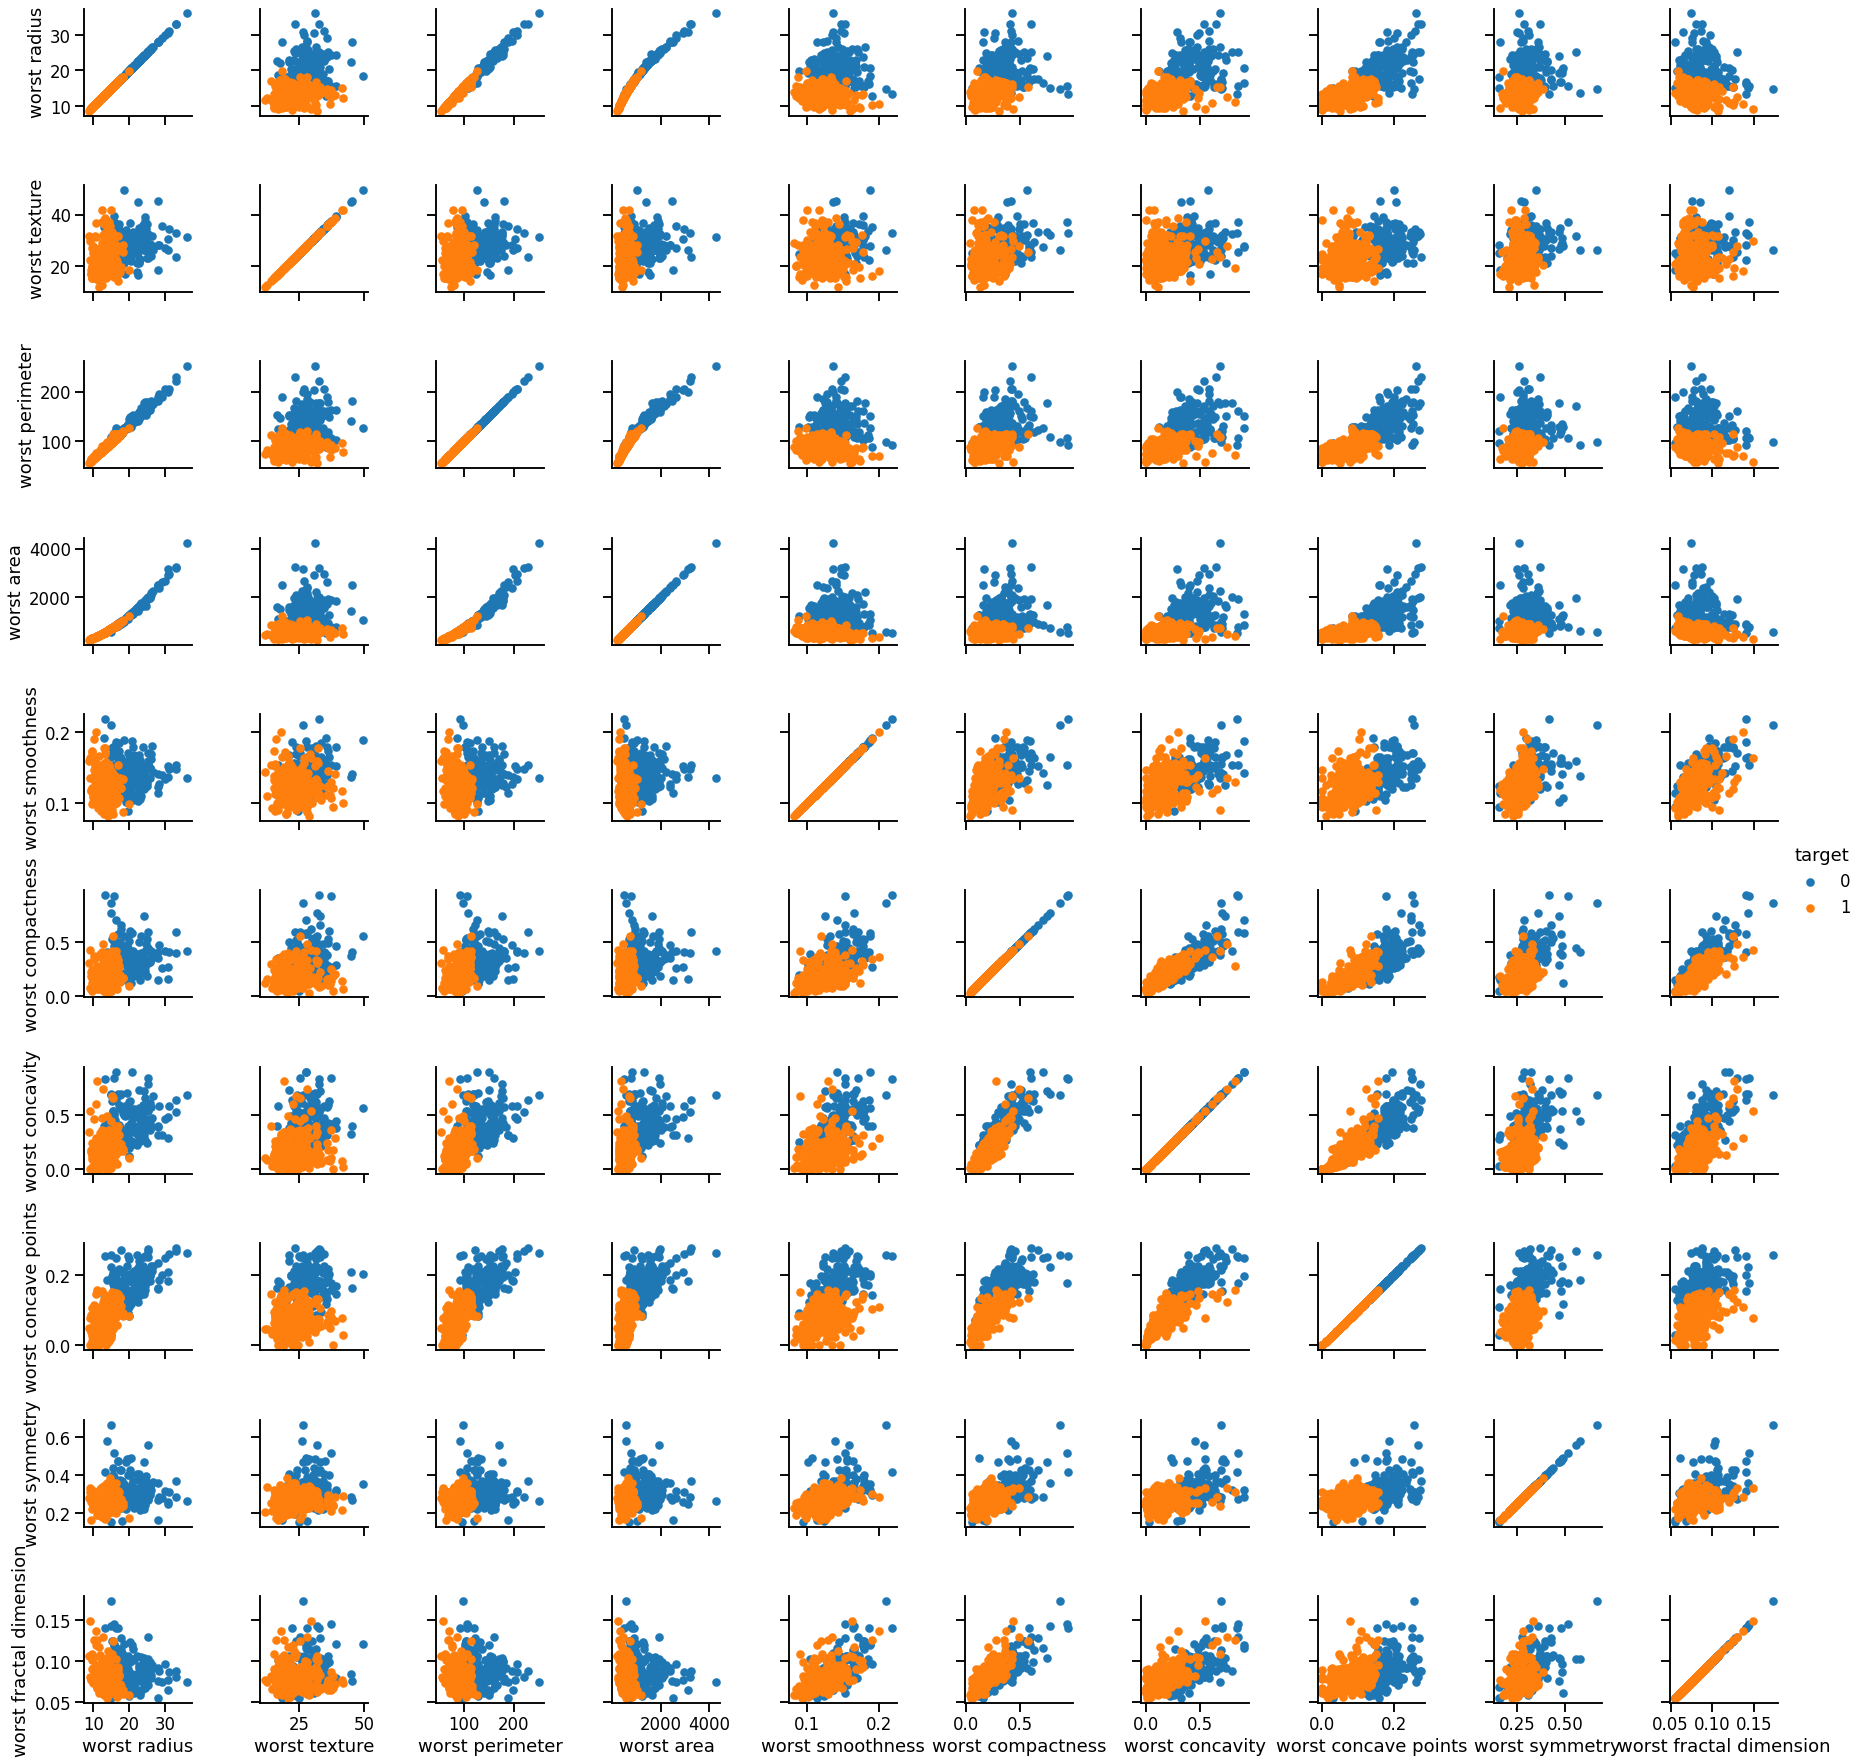

In [ ]:

df = pd.DataFrame(y_train, columns = ['target'])
concatenated = X_train.assign(target = y_train)
concatenated1 = concatenated.loc[:, 'worst radius':'target']
g = sns.PairGrid(concatenated1, hue="target")
g.map(plt.scatter, s=50)
g.add_legend()




Latihlah model SVM dengan kernel linear dengan fitur `worst radius` dan `worst concave points`. Gunakan nilai `C=100`.

In [ ]:

from sklearn.svm import SVC

mdl = SVC(C=100, kernel='linear')
mdl.fit(X_train[['worst radius','worst concave points']], y_train)

SVC(C=100, kernel='linear')



Visualisasikan batas keputusan dan support vectors yang didapatkan dari model pada soal 1.2.a.



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


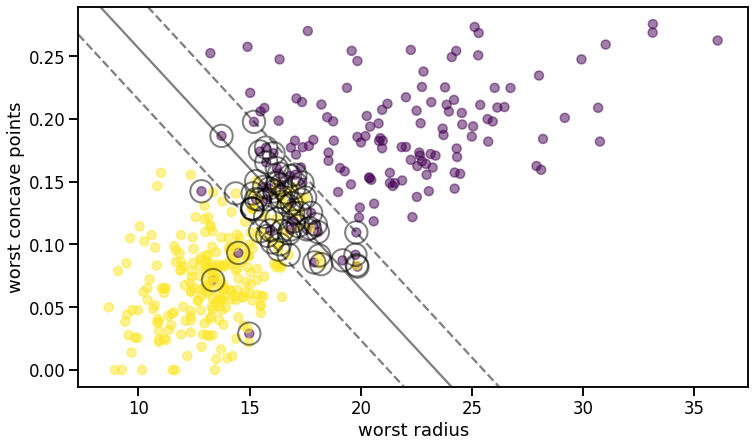

In [ ]:

colors = np.array(sns.color_palette())

def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=500, linewidth=2, edgecolor='k', facecolors='none', alpha=0.5);
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

fig, ax = plt.subplots(figsize=(12.0, 7.0))
ax.scatter(X_train['worst radius'], X_train['worst concave points'], c=y_train, alpha=0.5)
plt.xlabel('worst radius')
plt.ylabel('worst concave points')


plot_svc_decision_function(mdl, ax, True)

Mengganti kernel menjadi RBF tidak membantu meningkatkan kinerja dari model dalam kasus ini karena data sudah cenderung linearly separable dan transformasi dengan RBF tidak membuat titik yang salah diklasifikasi di dalam margin dapat dipisahkan dengan baik.



Visualisasikan hubungan nilai hyperparameter $C$ terhadap jumlah support vectors yang didapatkan dengan line plot.

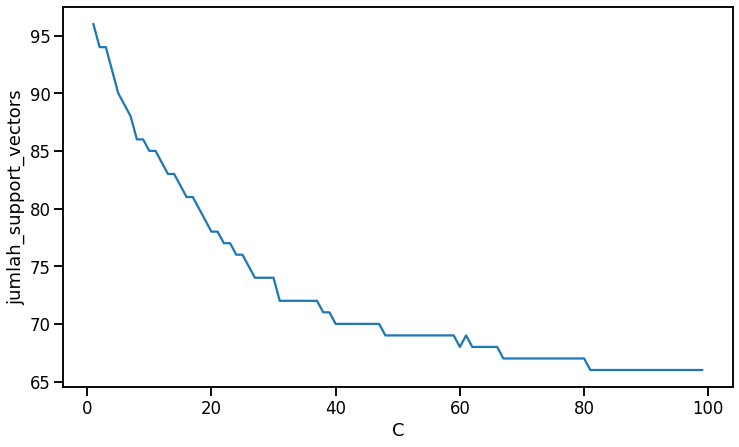

In [ ]:

sv = []
for c in range(1, 100):
    mdl = SVC(C=c, kernel='linear')
    mdl.fit(X_train[['worst radius','worst concave points']], y_train)
    sv.append(np.shape(mdl.support_vectors_)[0])

plt.plot(range(1, 100), sv)
plt.xlabel('C')
plt.ylabel('jumlah_support_vectors');

semakin keci C yang diambil maka semakin kecil juga marginnya sehingga jumlah support vektor semakin sedikit

 Gunakan dua fitur yang disebutkan pada soal 1.2.a, lalu lakukan 3-fold cross validation pada data latih. Hitung akurasinya dan gambarkan hubungan antara $C$ dan akurasi rata-rata. Anda dapat mencoba nilai $C \in \{10^{-3}, 10^{-2}, 10^{-1}, 10^{0}, 10^{1}, 10^{2}, 10^{3}\}$.

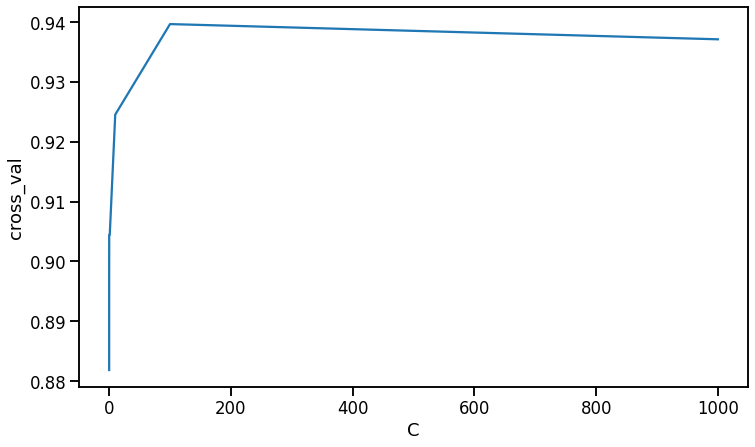

In [ ]:

from sklearn.model_selection import cross_val_score

cv = []
for c in [0.001, 0.01, 0.1, 1, 10, 100, 1000]:
    mdl = SVC(C=c, kernel='linear')
    mdl.fit(X_train[['worst radius','worst concave points']], y_train)
    cv.append(cross_val_score(mdl, X_train[['worst radius','worst concave points']], y_train, scoring='accuracy', cv=3).mean())

plt.plot([0.001, 0.01, 0.1, 1, 10, 100, 1000], cv)
plt.xlabel('C')
plt.ylabel('cross_val');




```
# This is formatted as code
```

terlalu besar C akan membuat memberi model penalti terlalu besar sehingga ovefit tetapi terlalu kecil C maka tidak akan memberikan perubahan besar pada model

## 2. Principal Component Analysis



Aplikasikan PCA pada data latih, lalu gambarkan hubungan antara jumlah komponen prinsipil dan rasio akumulasi variansi yang dijelaskan.

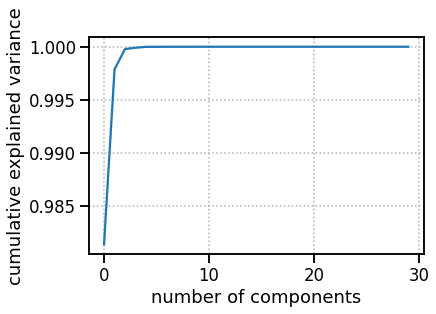

In [ ]:

from sklearn.decomposition import PCA

pca = PCA(random_state=42)
pca.fit(X_train)
plt.plot(
    pca.explained_variance_ratio_.cumsum()
)


plt.grid(linestyle=':')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');


Standardisasi fitur-fitur yang ada sebelum menerapkan PCA.

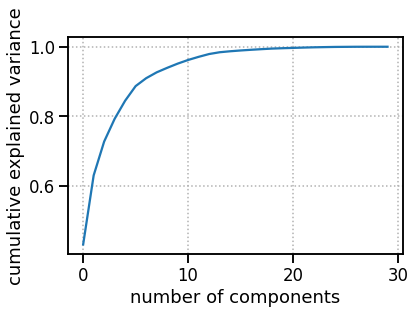

In [ ]:

from sklearn.preprocessing import StandardScaler

z = StandardScaler().fit_transform(X_train)
data_std = pd.DataFrame(z, columns=X_train.columns)

pca = PCA(random_state=42)
pca.fit(data_std)
plt.plot(
    pca.explained_variance_ratio_.cumsum()
)


plt.grid(linestyle=':')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');


Jumlah minimal komponen prinsipil yang dibutuhkan agar rasio variansi yang dijelaskan lebih dari 90%?

In [ ]:

np.argmax(pca.explained_variance_ratio_.cumsum() > .9) + 1

7


Hitung rata-rata akurasi dengan 3-fold cross-validation dengan konfigurasi berikut:

* Standardisasi fitur
* PCA dengan $PC \in [2, 20]$
* Classifier SVM dengan $C \in \{10^{-2}, 10^{-1}, 10^{0}, 10^{1}, 10^{2}\}$ dan kernel linear

Gambarkan hubungan antara jumlah PC, nilai $C$, dan akurasi yang dihasilkan.

*Petunjuk: Gunakan [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) dan [make_pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.make_pipeline.html) untuk mempermudah pekerjaan Anda.*

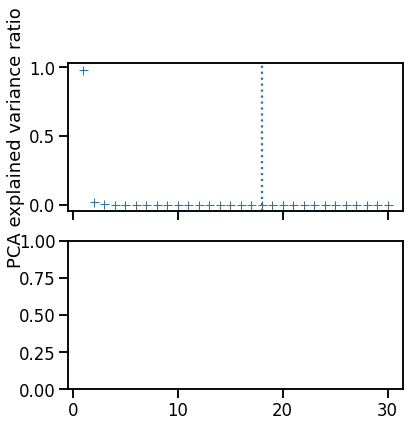

In [ ]:

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

pca = PCA(random_state=42)
scaler = StandardScaler()
svc = SVC()
pipe = Pipeline(steps=[("scaler", scaler), ("pca", pca), ("svc", svc)])


param_grid = {
    "pca__n_components": [x for x in range(2,21)],
    "svc__C": [0.01, 0.1, 1, 10, 100],
}
search = GridSearchCV(pipe, param_grid, n_jobs=2)
search.fit(X_train, y_train)

# Plot the PCA spectrum
pca.fit(X_train)

fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(6, 6))
ax0.plot(
    np.arange(1, pca.n_components_ + 1), pca.explained_variance_ratio_, "+", linewidth=2
)
ax0.set_ylabel("PCA explained variance ratio")

ax0.axvline(
    search.best_estimator_.named_steps["pca"].n_components,
    linestyle=":",
    label="n_components chosen",
)


In [ ]:

from sklearn import metrics
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score

x_train = X_train[['tenure','MonthlyCharges']]


errors = []
for k in range(2, 21):
  for c in [0.001, 0.01, 0.1, 1, 10, 100, 1000]:
    pipe = make_pipeline(
        PCA(n_components=k, random_state=42),
        SVC(C=c)
    )
    pipe.fit(data_std, y_train)
    errors.append({
        '1/k': 1/k,
        'train': metrics.f1_score(y_train, reg.predict(x_train)),
        'cross-val': cross_val_score(pipe, data_std, y_train, scoring='accuracy', cv=3).mean()
    })

pd.DataFrame(errors).set_index('1/k').plot.line()
plt.xlabel('$1/k$')
plt.ylabel('error')


Akurasi terbaik yang dihasilkan

In [ ]:

print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)


Best parameter (CV score=0.967):
{'pca__n_components': 18, 'svc__C': 10}




Definisikan fungsi untuk menghitung nilai specificity.

In [ ]:
def specificity_score(y_true, y_pred):

    tp = sum((y_true == 1) & (y_pred == 1))
    tn = sum((y_true == 0) & (y_pred == 0))
    fn = sum((y_true == 1) & (y_pred == 0))
    fp = sum((y_true == 0) & (y_pred == 1))
    return tn/ float( tn + fp)




Prediksi data uji dari model terbaik yang dihasilkan, lalu hitunglah nilai:

* Akurasi
* Sensitivity
* Specificity
* F1-score

In [ ]:

from sklearn.metrics import recall_score, accuracy_score, f1_score

zT = StandardScaler().fit_transform(X_test)
data_std_T = pd.DataFrame(zT, columns=X_test.columns)

pca = PCA(n_components=18, random_state=42)
pca.fit(data_std)
X_train_pca = pca.transform(data_std)
X_test_pca = pca.transform(data_std_T)

mdl = SVC(C=10)
mdl.fit(X_train_pca, y_train)
y_pred = mdl.predict(X_test_pca)


print("Akurasi =%0.3f" % accuracy_score(y_test, y_pred))
print("Sensitivity =%0.3f" % recall_score(y_test, y_pred))
print("Specifity =%0.3f" % specificity_score(y_test, y_pred))
print("F1-score =%0.3f" % f1_score(y_test, y_pred))

Akurasi =0.977
Sensitivity =0.981
Specifity =0.968
F1-score =0.981


 k-Means



Lakukan clustering dengan k-Means dengan $k = 2$ pada data latih dengan fitur `worst radius` dan `worst concave points`. Visualisasikan hasil clustering-nya, sertakan pula centroids-nya.

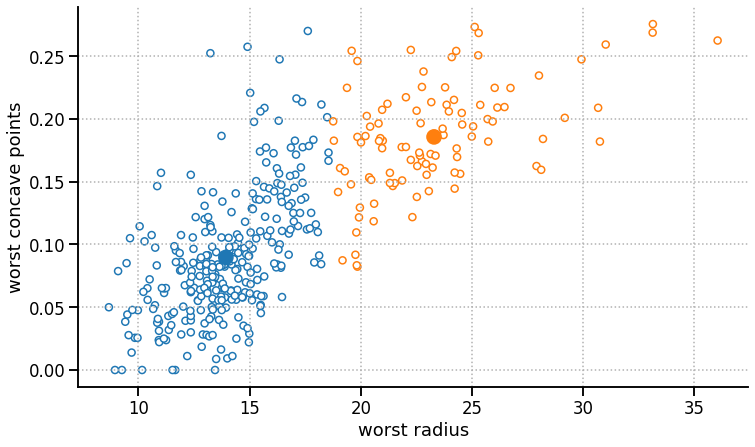

In [ ]:

from sklearn.cluster import KMeans

colors = np.array(sns.color_palette())
X = X_train[['worst radius','worst concave points']].to_numpy()

mdl = KMeans(2, random_state=42)
cluster = mdl.fit_predict(X)
centroids = mdl.cluster_centers_

fig, ax = plt.subplots(figsize=(12,7))
plt.scatter(*X.T, s=50, edgecolors=colors[cluster], facecolor='white')
plt.scatter(*centroids.T, s=200, c=colors[range(2)])
plt.grid(linestyle=':')
plt.xlabel('worst radius')
plt.ylabel('worst concave points')
sns.despine()


Hitung akurasi pada data latih jika kita mengasosiasikan cluster dari soal sebelumnya dengan kelas.


In [ ]:

from sklearn.metrics import accuracy_score

mapping = {0:1, 1:0, 2:'blue'}
a = [mapping[i] for i in mdl.labels_]

accuracy_score(y_train, a)

0.871859296482412


Lakukan kembali proses clustering, tetapi kali ini standardisasi fiturnya terlebih dahulu.

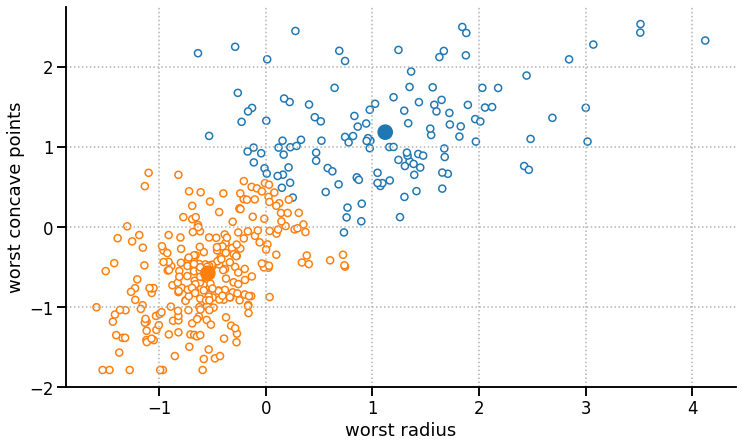

In [ ]:

data_std

X = data_std[['worst radius','worst concave points']].to_numpy()

mdl = KMeans(2, random_state=42)
cluster = mdl.fit_predict(X)
centroids = mdl.cluster_centers_

fig, ax = plt.subplots(figsize=(12,7))
plt.scatter(*X.T, s=50, edgecolors=colors[cluster], facecolor='white')
plt.scatter(*centroids.T, s=200, c=colors[range(2)])
plt.grid(linestyle=':')
plt.xlabel('worst radius')
plt.ylabel('worst concave points')
sns.despine()


akurasi yang Anda dapatkan pada data latih dengan model sebelumnyA

In [ ]:
# kode Anda di sini
accuracy_score(y_train, mdl.labels_)

0.9422110552763819

standardisasi fitur dapat membantu dalam kasus ini Karena algoritma kmean clustering menggunakan pengukuran berbasis jarak untuk menentukan kesamaan antara titik data, disarankan untuk menstandarisasi data agar memiliki rata-rata nol dan standar deviasi satu karena fitur dalam kumpulan data memiliki unit pengukuran yang berbeda.



Jalankan k-Means dengan $k \in [2, 20]$ dengan fitur `worst ...` dari data latih. Standardisasi lah fiturnya terlebih dahulu. Gambarkan hubungan antara nilai $k$ dengan total jarak agregat interklaster.

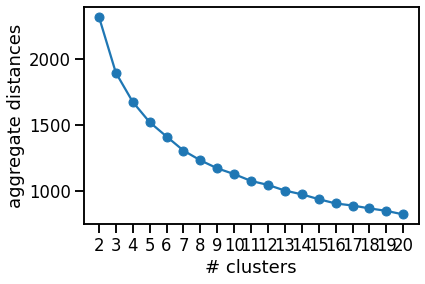

In [ ]:

v = []
for i in range(2,21):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data_std.loc[:, 'worst radius':'worst fractal dimension'])
    v.append(kmeans.inertia_)

plt.plot(range(2,21), v, 'o-')
plt.xticks(range(2,21), range(2,21))
plt.xlabel('# clusters')
plt.ylabel('aggregate distances');



Karena Anda hanya bisa menggunakan dua klaster agar bisa dibandingkan dengan kelas referensi, jalankan kembali algoritma k-Means ke data latih dengan fitur `worst radius` dan `worst concave points`. Prediksi data uji dengan menggunakan model yang didapatkan.

In [ ]:

X = X_train[['worst radius','worst concave points']].to_numpy()

mdl = KMeans(2, random_state=42)
mdl.fit(X_train)
y_pred = mdl.predict(X_test)

accuracy_score(y_test, y_pred)

0.8596491228070176